# Datation des surfaces planétaires par distribution en fréquence de taille des cratères d'impact

Les surfaces des planètes et lunes telluriques sont recouvert de cratères d'impact.
Les cratères sont formés par le flux constant d'astéroïdes qui heurtent la surface de la Terre.
Le principe de base est très simple, plus on observe de cratères sur une surface géologique plus cette dernière est vielle.
Ce notebook a trois objectifs :
- Comprendre comment les surfaces planétaires sont datées
- Avoir un exemple d'utilisation d'un modèle et comment l'exploiter au mieux
- Découvrir le concept de notebook et présenter du code python de façon interactive


## Observations





In [1]:
# @hidden_cell.

import ipywidgets as widgets
from IPython.display import Javascript, display

style = {'description_width': 'initial'}

# Choix de l'âge
age_slider = widgets.FloatSlider(value = 3, min = 0.1, max = 4, step = 0.1, description = r'Age (Ga) :')
display(age_slider)

Diam_min_input = widgets.BoundedFloatText(
    value=0.5,
    min=0.1,
    max=9.0,
    description='Diamètre minimal (km) :',
    disabled=False,
    style =style
)
display(Diam_min_input)

Diam_max_input = widgets.BoundedFloatText(
    value=50,
    min=10,
    max=500,
    description='Diamètre maximal (km) :',
    disabled=False,
    style =style
)
display(Diam_max_input)


def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))

button = widgets.Button(description="Modéliser")
button.on_click(run_all)
display(button)

FloatSlider(value=3.0, description='Age (Ga) :', max=4.0, min=0.1)

BoundedFloatText(value=0.5, description='Diamètre minimal (km) :', max=9.0, min=0.1, style=DescriptionStyle(de…

BoundedFloatText(value=50.0, description='Diamètre maximal (km) :', max=500.0, min=10.0, style=DescriptionStyl…

Button(description='Modéliser', style=ButtonStyle())

In [2]:
# Ce morceau de code permet de modéliser une distribution en fréquence de taille de cratère pour un âge donné (=isochrone)

from matplotlib import pyplot as plt
import numpy as np

age = age_slider.value

# On construit un axe des ordonnées discret
N_Diam = 4000
Diam_min = Diam_min_input.value
Diam_max = Diam_max_input.value


X_bin_size = (np.log10(Diam_max) - np.log10(Diam_min)) / (N_Diam)
i_Diam = np.log10(Diam_min) + np.arange(0, N_Diam + 1) * X_bin_size
classe_Diam = 10 ** i_Diam


# Cette fonction permet de calculer une isochrone
def modele_isochrone(classe_Diam, age):
    # Coefficients du modèle pour la Lune
    # Neukum (2001)
    Coef_FP = [-3.0768, -3.557528, 0.781027, 1.021521,
               -0.156012, -0.444058, 0.019977, 0.086850,
               -0.005874, -0.006809, 8.25 * 10 ** (-4), 5.54 * 10 ** (-5)]
    # Neukum (2001)
    Coef_chrono = [5.44 * 10 ** (-14), 6.93, 0, 8.38 * 10 ** (-4)]
    
    
    Age_factor = (Coef_chrono[0] * (np.exp(Coef_chrono[1] * age) - 1)
              + Coef_chrono[3] * age)

    isochrone_cumu = np.full(N_Diam + 1, np.nan)
    for i_Diam in range(0, N_Diam):
        isochrone_cumu[i_Diam] = Age_factor * 10 ** np.sum(
            Coef_FP[1:] * np.log10(classe_Diam[i_Diam]) ** np.arange(1, len(Coef_FP)))

    isochrone = -(isochrone_cumu[1:] - isochrone_cumu[:-1]) / (classe_Diam[1:] - classe_Diam[:-1])

    return isochrone

isochrone = modele_isochrone(classe_Diam, age)

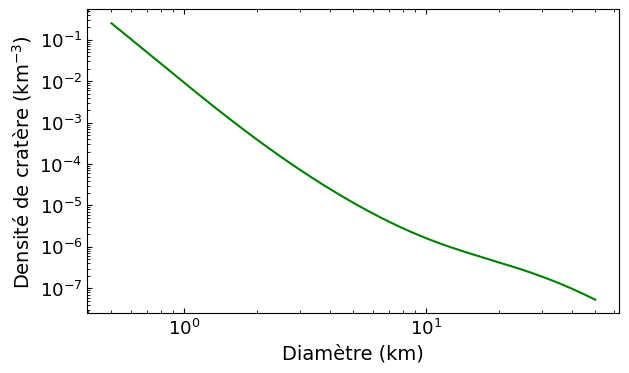

In [3]:
# Cette fonction permet de créer une figure de l'isochrone
def figure(classe_Diam, isochrone):
    Diam_vec = np.sqrt(classe_Diam[1:]*classe_Diam[:-1])
    
    fig_date = plt.figure(figsize = (7,4))
    CSFD_axes = fig_date.add_axes([0.12, 0.12, 0.76, 0.76])

    # now let's do the crater density
    CSFD_axes.plot(Diam_vec, isochrone, color='g')
    
    CSFD_axes.set_xscale('log')
    CSFD_axes.set_yscale('log')

    CSFD_axes.tick_params(direction='in', top=True, which='both', labelsize=13)
    CSFD_axes.set_ylabel(r'Densité de cratère (km$^{-3}$)', fontsize=14)
    CSFD_axes.set_xlabel(r'Diamètre (km)', fontsize=14)

    plt.show()


figure(classe_Diam, isochrone)